In [31]:
import matplotlib.pyplot as plt
import numpy as np


## Questo file esplicita tutti i calcoli ed i passaggi necessari al dimensionamento del
## convertitore
##------------------------------valori standard---------------------------------

Rsen = 0.01

## Array di valori di frequenze da 100KHz a 1MHz (massimo valore possibile da datasheet)
Fs = np.arange(100000,1E6,10000)

##------------------------------valori in ingresso-----------------------------------

index = np.where(Fs == 3E5) # valore di frequenza in uso

## Valori di tensione in ingresso, uscita e ripple [V]
Vin_min = 11
Vin_max = 27
Vin_nominale = 19

Vout = 5

#Vripple_percentage = 
Vripple = 0.01

# Resistenze Rfb1 e Rfb2 [Kohm] da decidere sapendo che Rfb2/Rfb1 = Vout/1,25 - 1
Rfb1 = 3.3
Rfb2 = 10

## Valori di corrente massima in uscita [A] e massimo ripple stimato in percentuale o stimato
Iout = 3
#Ior_estimated = 
Ior_percentage = 7
Ior_max = Ior_percentage * Iout / 100

## Parametri del MOSFET e del diodo
#tempi di ritardo del MOSFET [s]
tdon = 29E-9
tdoff = 115E-9

#tensione di polarizzazione del diodo [V]
Vf = 0.52




In [32]:
## Tempo di ritardo del MOSFET
td = 50E-9 + tdoff - tdon

## RT
RT = Vout * (Vin_nominale - 1.56)/(1.45E-7 * Vin_nominale * Fs) -(td) * (Vin_nominale - 1.56)/(1.45E-7) - 1.4
Fixed_RT = float(RT[index])

## Ton Ton_min (il tempo Ton minimo viene calcolato al massimo valore di tensione possibile)
## Ton viene calcolato con tensione in ingresso nominale
## Ton_min non dovrebbe essere minore di 150 ns (Lm25085 datasheet: Current limiting)
Ton = (1.45E-7*(RT+1.4))/(Vin_nominale-1.56+RT/3167) + 50E-9
Ton_min = (1.45E-7*(Fixed_RT+1.4))/(Vin_max-1.56+Fixed_RT/3167) + 50E-9
Ton_max = (1.45E-7*(Fixed_RT+1.4))/(Vin_min-1.56+Fixed_RT/3167) + 50E-9

## Calcolo dell'induttanza L e valore minimo di ripple
#L = (Ton_min*(Vin_max - Vout))/Ior_estimated
L = (Ton_min*(Vin_max - Vout))/Ior_max
Ior_min = ((Vin_min-Vout)*Ton_max)/L

## Condensatore Cout
Cout = Ior_max/(8*float(Fs[index])*Vripple)

# Limitatore di corrente a Iout + Iripple/2
Icl = Iout + Ior_max/2
Radj = Rsen*Icl/32E-6

#Potenza dissipata dal diodo
D_max = Vout/Vin_min #massimo duty cycle
Pd = Icl*Vf*(1-D_max)

# R4, Cff, Cbyp, Cin
R4 = (25E-3)/Ior_min
Cff = (3*Ton_max)/((Rfb1*Rfb2)/(Rfb1+Rfb2))
Cin_plus_Cbyp= Iout*Ton_max/Vripple

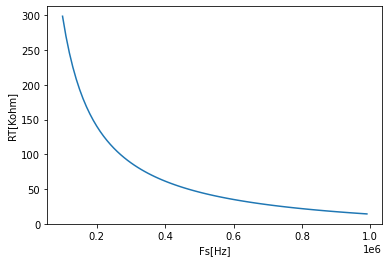

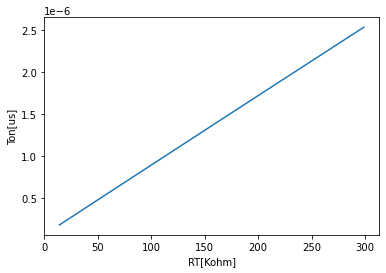

Fs = 300000.0 Hz
Ton = 790.0173198348273 ns

Parametri della rete che compone il buck controller:
RT = 87.7476249243799 Kohm
Radj = 970.3125000000001 ohm
R4 = 0.17196142387801502 ohm
Cff = 1.711244937111655 uF
Cin + Cbyp = 424.59460845627524 uF

Filtro passa-basso e parametri utili per la scelta del diodo:
Pd = 0.8806909090909091 W
L = 58.4111147528555 uH
Cout = 8.75 uF


In [33]:
#tutte le informazioni riguardo al comportamento di alcune componenti della rete passiva sono mostrate qui

plt.plot(Fs,RT)
plt.ylabel("RT[Kohm]")
plt.xlabel("Fs[Hz]")
plt.show()


plt.plot(RT,Ton)
plt.ylabel("Ton[us]")
plt.xlabel("RT[Kohm]")
plt.show()

print("Fs = " + str(float(Fs[index])) + " Hz")
print("Ton = " + str(float(Ton[index]*1E9)) + " ns\n")
print("Parametri della rete che compone il buck controller:")
print("RT = " + str(float(RT[index])) + " Kohm")
print("Radj = " + str(Radj) + " ohm")
print("R4 = " + str(R4) + " ohm")
print("Cff = " + str(Cff*1E6) + " uF")
print("Cin + Cbyp = " + str(Cin_plus_Cbyp*1E6) + " uF\n")
print("Filtro passa-basso e parametri utili per la scelta del diodo:")
print("Pd = " + str(Pd) + " W")
print("L = " + str(L*1E6) + " uH")
print("Cout = " + str(Cout*1E6) + " uF")
